NumPy (SciPy) Workshop - 20 July 2018

# Import NumPy <br>
NumPy is an external library; traditionally imported as 'np'

In [1]:
# Import
import numpy as np
import sys #Also import sys to check python version

print ("Numpy version:", np.__version__)
print ("Python version:", sys.version)

Numpy version: 1.13.3
Python version: 3.5.2 |Enthought, Inc. (x86_64)| (default, Mar  2 2017, 16:37:47) [MSC v.1900 64 bit (AMD64)]


# What is NumPy (and SciPy)?
NumPy is the fundamental package for scientific computing with Python. It contains among other things: <br> <br>

-a powerful N-dimensional *array* object <br>
-fast, parallelized math functions <br>
-tools for integrating C/C++ and Fortran code <br>
-useful linear algebra, Fourier transform, and random number capabilities <br> <br>

NumPy was originally forked (derived) from SciPy, so that one could avoid importing the large SciPy package just to get an array object; therefore, it contains many redundancies with SciPy, but is also incomplete with regards to some functionality. <br> <br>

Broadly speaking, NumPy is the basis for the scientific computing and data science stacks in Python, including SciPy and Pandas. <br>

# Arrays <br>

The fundamental 'object' in NumPy is the *array* <br>
Compared to default Python, *lists* $\approx$ *arrays*, except every element of an *array* **must be of the same type** <br>

In [2]:
# Arrays can be created from lists...
l1 = [1, 2, 3, 4]
a1 = np.array(l1)
a1.reshape(4,1)
print('l1 is of ' + str(type(l1))[1:-1])
print('a1 is of ' + str(type(a1))[1:-1])

# Or lists can be created from arrays...
a2 = np.array([1, 2, 3, 4])
l2 = list(a2)
a2.reshape(1,4)
print('l2 is of ' + str(type(l2))[1:-1])
print('a2 is of ' + str(type(a2))[1:-1])

print('It is ' + str(np.all(a1 == a2)) + #np.all is described later
      ' that a1 is identical to a2') 

l1 is of class 'list'
a1 is of class 'numpy.ndarray'
l2 is of class 'list'
a2 is of class 'numpy.ndarray'
It is True that a1 is identical to a2


But, again, all elements of an *array* must be of the same type! <br>

So, if you feed an array something of mixed data type, it will force everything into one type and normal math operations may not function



In [3]:
l3 = ['test', 2, 3, 4] # a list with mixed type
a3 = np.array(l3) # a numpy array from the list of mixed type
print(str(a3[1]*2) + ' does not equal ' + str(l3[1]*2))
print('This is because in a NumPy array, "2" is being treated as ' +
      str(type(a3[1]))) 
print('In the list, "2" remains ' +
      str(type(l3[1])))
a3 #full output, unsuppressed

22 does not equal 4
This is because in a NumPy array, "2" is being treated as <class 'numpy.str_'>
In the list, "2" remains <class 'int'>


array(['test', '2', '3', '4'],
      dtype='<U4')

Note the 'dtype' output in the full description of the 'a3' array above <br>
'dtype' = data type <br>
'dtype' is both a standalone class object in numpy (see [Data Type Objects](https://docs.scipy.org/doc/numpy-1.14.0/reference/arrays.dtypes.html) and [np.dtype](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.dtype.html) ) and an attribute of an *array* ('a4.dtype', for ex) describing the **datatype of the elements in that array**<br>
There are various defaults for assigning datatypes to arrays without returning errors (as in the above, a mixed *string* and *int* list was converted to unicode; two floats of different accuracy will be converted to the one of higher accuracy, etc.)<br>
See [Data Types](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html) for a concise list of datatypes <br> <br>

If you want to be explicit about your *array*  datatype, you can call *dtype* when forming an *array*

In [4]:
a4 = np.array([1, 2, 3, 4], dtype=float) #note: could be 'float64'
print('It is ' + str(type(a4) == type(a1)) +
      ' that both a4 and a1 are arrays of ' + str(type(a4)))
print('The elements in the original array a1 were' + str((a1[0]).dtype))
print('The elements in a4 were "cast" into ' + str((a4[0]).dtype))

It is True that both a4 and a1 are arrays of <class 'numpy.ndarray'>
The elements in the original array a1 wereint32
The elements in a4 were "cast" into float64


Note: though at times one can simply recast the dtype with (for example)

```
a4.dtype = 'np.int'
```
The safer and more consistent way to recast dtype is with the *array* method *array*.astype
```
a4.astype(np.int)
```
as done in the code below

In [5]:
a4 = np.array([1, 2, 3, 4], dtype=float)
print('a4 is ' + str(a4))
print('elements of a4 are of type ' + str(a4.dtype))
print('Though the elements can be cast back into the original form with dtype,')
print('in this case they\'re re-written (as a copy) onto the original with astype')
a4 = a4.astype(np.int)
print('a4 is now ' + str(a4))
print('elements of a4 are now of type ' + str(a4.dtype))

a4 is [ 1.  2.  3.  4.]
elements of a4 are of type float64
Though the elements can be cast back into the original form with dtype,
in this case they're re-written (as a copy) onto the original with astype
a4 is now [1 2 3 4]
elements of a4 are now of type int32


The above example with ```array.astype(...)``` utilizes the concept of 'copying' an array<br>
It is worth noting that,  like Python lists, **arrays are not immutable** <br>
When an new array is made from another array, for example, it points directly to that original array <br>
And when that new array is modified, that old array is modified as well <br>
You can use [*array*.copy()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.copy.html) to be safer <br>

In [6]:
a5 = a4
print('The array a4 is')
print(a4)
a5[-1] = int(5)
print('After modifying the last element of a5, both a5 and a4 are')
print(a4)
a4 = np.array([1, 2, 3, 4], dtype=int)
a5c = a4.copy()
a5c[-1] = int(5)
print('After modifying the last element of a5c, a copy of a4, a4 is the same')
print(a4)

The array a4 is
[1 2 3 4]
After modifying the last element of a5, both a5 and a4 are
[1 2 3 5]
After modifying the last element of a5c, a copy of a4, a4 is the same
[1 2 3 4]


Okay-- <br>
Everything we have done so far with one-dimensional *arrays* is basically identical to Python *lists*...<br>
One of the well-known benefits of NumPy, however, is more computationally efficient operations (it better exploits *C*). This extends even to 1-D arrays vs lists--but it is most obvious with large arrays

Here is an example highlighting the difference between Python's built-in ```range()``` and ```np.arange()```

In [7]:
#modified from https://stackoverflow.com/questions/10698858/built-in-range-or-numpy-arange-which-is-more-efficient

time_size = int(1E6)

# Loop index example
print('range() loop-index example timed')
%timeit for x in range(time_size): x ** 2
#out: 1 loop, best of 3: 287 ms per loop
print('np.arange() loop-index example timed')
%timeit for x in np.arange(time_size): x ** 2
#out: 1 loop, best of 3: 162 ms per loop

# Math example
print('range() math example timed')
%timeit list(range(time_size)) * 2
#out: 10 loops, best of 3: 49.7 ms per loop
print('np.arange() math example timed')
%timeit np.arange(time_size) * 2
#out: 1000 loops, best of 3: 1.87 ms per loop

range() loop-index example timed
1 loop, best of 3: 1.46 s per loop
np.arange() loop-index example timed
1 loop, best of 3: 799 ms per loop
range() math example timed
10 loops, best of 3: 95.7 ms per loop
np.arange() math example timed
100 loops, best of 3: 9.75 ms per loop


So, [np.arange](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.arange.html) is **faster** Python's built-in [range](https://docs.python.org/3/library/functions.html#func-range), even when used just for building a loop index--use it whenever you have already imported NumPy! <br>
When used for a straight-forward mathematical operation, it is **way faster** <br> 
Note: in the above example,

```
%timeit
```

is 'iPython magic' -- these functions are beyond the scope of this workshop, but as they have default and modifiable integration into Jupyter notebooks, they are worth reading about. <br>
<br>
For more information, see [Built-in Magic Commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html)

##Exercise 1
Using [np.linspace](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linspace.html), create an *array* with *dtype* ```int``` of length 1 million (1E6) evenly spaced between '0' and '1E6,'' with '0' omitted. That is, $[1, 2, 3, ... 1*10^6]$ <br>

Bonus: use *%timeit* to compare how long it takes to create this *array* VS. how long it takes to create a *list* with the same elements from Python's built-in *range* function.

Hint: You may need to index for the *range* function to omit '0'

In [8]:
million = np.linspace(1,time_size,num=time_size, dtype=int)
print((million))

%timeit np.linspace(1,time_size,num=time_size, dtype=int)
#out: 100 loops, best of 3: 4.33 ms per loop

size_thousand = 1001
%timeit list(range(time_size))[1:]
#out: 10 loops, best of 3: 41.6 ms per loop

[      1       2       3 ...,  999998  999999 1000000]
10 loops, best of 3: 18.9 ms per loop
10 loops, best of 3: 96.8 ms per loop


## NumPy Speed-up, In General


More generically, NumPy will save computational (and coding) time if it replaces coding *loops* with *vectorized* (or any higher-dimensional) math.<br> <br>
Here is an example comparing NumPy element-wise multiplication vs. loop-based indexing for element-wise multiplication 

In [9]:
#modified from https://stackoverflow.com/questions/47755442/what-is-vectorization
a40 = np.array([[1., 2., 3.]])
print('The array')
print(a40)
# By default all arithmetic operators (like *) in NumPy are element-wise
a4040 = a40 * a40
print('The array a40 * a40 (squared) is ')
print(a4040)
print('%timeit of the operation is')
%timeit a40 * a40
# out: 1.19 microsec (with cached)
# Compare this to python math with loops to complete element wise
l40 = a40.tolist()[0]
sq = [0., 0., 0.] # pre-allocate empty list (for speed)
def square(lst,empty):
  for i in np.arange(len(l40)): #use np.arange, even (still slower)!
    empty[i] = l40[i] * l40[i]
  return empty
sq = square(l40,sq)
print('The array l40[i] * l40[i] for i in len(l40) (squared) is ')
print(sq)
%timeit square(l40,sq)
#out: 6.5 microsec (with cached)

The array
[[ 1.  2.  3.]]
The array a40 * a40 (squared) is 
[[ 1.  4.  9.]]
%timeit of the operation is
The slowest run took 22.55 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.13 µs per loop
The array l40[i] * l40[i] for i in len(l40) (squared) is 
[1.0, 4.0, 9.0]
100000 loops, best of 3: 8.49 µs per loop


So in general, if you want to speed up your code with NumPy, **avoid loops at all cost**. This includes list-comprehensions (which are loops)--these are included in this workshop for brevity, not for speed.

Note: **Do not expect a non-element-wise operator from the default arithmetic operators.** <br>
A common confusion with non-element-wise operations is regarding ```*``` vs. the *dot product*, which is actually given by [np.dot(...)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html); <br>
However, since row and column dimensions are important for linear opertors, you should first understand NumPy array dimensionality (that is, *shape*) to use *np.dot(...)*

# Multidimensional Arrays (and Matrices)

You may have noticed earlier, that the *type* of an *array* is

```
numpy.ndarray
```
What is an 'ndarray'?<br>
This refers to NumPy's exceptional ability to build and perform math on *arrays* of arbitrary (*N*) dimensionality. <br>
In more concrete terms: <br>
a vector is a 1-D array (as we have been working with) <br>





In [10]:
a6 = np.array([1, 2, 3, 4])
print(a6)

[1 2 3 4]


Note that every *array* has a *shape* attribute (tuple) that is tied to it. <br>
By default, the dimensionality of a given array is as short as possible (1's omitted)

In [11]:
print('The shape of a6 is')
print(a6.shape)

The shape of a6 is
(4,)


In relation to 2-D matrix math (linear algebra): this 1-D array can be either a column vector or row vector <br>
And the most generic  way to enforce the direction of the 1-D vector in 2-D space is with [*np.reshape(...)*](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.reshape.html) or with [*array.reshape(...)*](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.reshape.html#numpy.ndarray.reshape); the latter having slightly easier syntax

In [12]:
print('Again, the shape of a6 is')
print(a6.shape)
a6 = a6.reshape(4,1) # array.reshape automatically acts on a6
print('After reshaping to (4,1), a6 prints like this')
print(a6)
a6 = np.reshape(a6,(1,4)) #np.reshape is wordy, must be directed at a6
print('After reshaping to (1,4), a6 prints like this')
print(a6)

Again, the shape of a6 is
(4,)
After reshaping to (4,1), a6 prints like this
[[1]
 [2]
 [3]
 [4]]
After reshaping to (1,4), a6 prints like this
[[1 2 3 4]]


# Note: Broadcasting, a perplexing default for element-wise operators
Now that we've introduced the concept of *array* dimensionality and *shape*, it is worth mentioning that NumPy's ```*``` (and other element-wise operators) follow a strange rule called [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) when given two arrays of differing *shapes*. <br>
Of course, element-wise operations can only work if the shape of the *arrays* is the same in each dimension. If they are not, it will throw a 

```
ValueError: frames are not aligned
```


However, **if one of the *array* dimensions is 1 (and the other is greater than 1), the array will be 'stretched' (*tiled*) to match the greater dimension** and the output will be of larger dimensionality than you might have anticipated!

In [66]:
a6_h = a6.reshape(4,1)
a6_v = a6_h.T # .T short-hand is an 'attribute' of an array class, described below
print('Because of broadcasting, the output is')
print(a6_h * a6_v)
print('instead of (as you might have been trying to do)')
print(a6_h * a6_v.T)

Because of broadcasting, the output is
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]]
instead of (as you might have been trying to do)
[[ 1]
 [ 4]
 [ 9]
 [16]]


## Aside: class attributes are useful; example Matrix Class
Note, in the above example, [*array.T*](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T) is an attribute of arrays utilized to perform a transpose (swapping of dimensions) as a short-hand. <br>
This will only work *after* the second dimension has been defined by *array.reshape* <br>
These attributes are powerful shorthand (we've already used *dtype* and *shape*) for items of class type *ndarray* <br>
Another example attribute of *ndarray*s is [*array.real*](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.real.html#numpy.ndarray.real) , which saves time when working with complex numbers in taking only the 'real' part of array

In [14]:
a7 = np.array([3, 1, 4+0.1j, 1, 5-2j, 9, 2, 6+2j, 5])
print(a7)
print(a7.real)

[ 3.+0.j   1.+0.j   4.+0.1j  1.+0.j   5.-2.j   9.+0.j   2.+0.j   6.+2.j
  5.+0.j ]
[ 3.  1.  4.  1.  5.  9.  2.  6.  5.]


Similarly, in relation to matrix math (linear algebra), there is a special *array* class *matrix* which may be called to form a 2-D matrix with [np.mat](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mat.html) <br>
This [*matrix*](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.matrix.html#numpy.matrix) class will carry its own shorthand attributes that are useful <br>

*matrix.T* = transpose

*matrix.H* = Hermitian transpose (transpose with complex conjugate) A.H=transpose(A*)

*matrix.I* = matrix inverse

*matrix.A* = matrix as a basic ndarray

*matrix.A1* = matrix as a one-dimensional ndarray

In [15]:
#From Christina Maimone's (NU's Research Computing Services) '17 Numpy/Scipy 
A = np.mat([[3, 1, 4+0.1j], [1, 5-2j, 9], [2, 6+2j, 5]])

print(type(A))

A_tr = A.T
A_H = A.H
A_I = A.I
A_A = A.A
A_A1 = A.A1

print('\n Transpose of A=')
print(A_tr)
print('\n Hermitian of A=')
print(A_H)
print('\n Inverse of A=')
print(A_I)
print('\n Standard ndarray=')
print(A_A)
print('\n One dimestional array of A=')
print(A_A1)

<class 'numpy.matrixlib.defmatrix.matrix'>

 Transpose of A=
[[ 3.+0.j   1.+0.j   2.+0.j ]
 [ 1.+0.j   5.-2.j   6.+2.j ]
 [ 4.+0.1j  9.+0.j   5.+0.j ]]

 Hermitian of A=
[[ 3.-0.j   1.-0.j   2.-0.j ]
 [ 1.-0.j   5.+2.j   6.-2.j ]
 [ 4.-0.1j  9.-0.j   5.-0.j ]]

 Inverse of A=
[[  3.64238411e-01+0.06622517j  -1.87468161e-01+0.03005604j
    4.73764646e-02-0.11436577j]
 [ -9.93377483e-02+0.06622517j  -5.24707081e-02+0.03718798j
    1.75241977e-01-0.11793174j]
 [ -8.20270509e-18-0.06622517j   1.52827305e-01-0.0356597j
   -7.64136526e-02+0.1171676j ]]

 Standard ndarray=
[[ 3.+0.j   1.+0.j   4.+0.1j]
 [ 1.+0.j   5.-2.j   9.+0.j ]
 [ 2.+0.j   6.+2.j   5.+0.j ]]

 One dimestional array of A=
[ 3.+0.j   1.+0.j   4.+0.1j  1.+0.j   5.-2.j   9.+0.j   2.+0.j   6.+2.j
  5.+0.j ]


## 2-D Arrays outside the Matrix Class
In a non class-specific sense, a matrix can be thought of as a 2-D *array* where both of the dimensions are strictly greater than 1 <br>
This can be formed from the get-go by bracketing comma-separated sets of bracket-ed *arrays* or it can be formed by *array.reshape(...)* on an *array* of different dimensionality <br>

In [16]:
a8 = np.array([ [3, 3], [3, 3] ])
print('A 2x2 matrix like')
print(a8)
print('has shape')
print(a8.shape)

a8 = a6.reshape(2,2)
print('\n A 2x2 matrix formed by reshaping')
print(a8)
print('has shape')
print(a8.shape)

A 2x2 matrix like
[[3 3]
 [3 3]]
has shape
(2, 2)

 A 2x2 matrix formed by reshaping
[[1 2]
 [3 4]]
has shape
(2, 2)


Note that *array.reshape* only works if the dimensions multiply to the overall size of the array <br>
That is, in the example above, $\text{dimension 1 } (\text{ex. } 2) * \text{dimension 2 } (\text{ex. } 2) = \text{overall size } (\text{ex. }4)$ <br>
You can query the overall size of any *array* with the method [*array.size*](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.size.html)

In [17]:
print('The overall size of a8 is')
print(a8.size)
print('The relationship between dimension in np.shape and np.size is ' +
      str(a8.shape[0] * a8.shape[1] == a8.size))

The overall size of a8 is
4
The relationship between dimension in np.shape and np.size is True


# Note: 'Length' vs 'size'

The built-in Python function ```len``` **will only return the length of the first dimension of a NumPy *array* **<br>
When working with any *array*, then, it is safer to use *np.shape* or the method *array.shape()*, and index this tuple to return the length in a specific dimension.

In [18]:
a9 = a8.reshape(1,4)
print('It is ' + str(len(a9) == a9.shape[1]) + 
      ' that the len function reads the 2nd dimension')

It is False that the len function reads the 2nd dimension


In general, dimensionality can be stepped up to any arbitrary N-dimensions (as long as there are enough elements to satisfy to the overall shape) <br>
For ex. a 'hypercube' or 'hyperplane' in *N*-dimensional 'hyperspace' will be of *N*-dimensions <br> <br>
Perhaps the two most useful of all commands for creating *N-D arrays* is [np.repeat(...)](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.repeat.html#numpy.repeat) and [np.tile(...)](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.tile.html#numpy.tile).

## Exercise 2

Create an 4-dimensional array with ```np.repeat(...)``` and ```np.tile(...)``` <br>
The array should be filled with *1*s and be of shape ```(4, 4, 4, 4)``` <br>
Bonus: write a function to generalize this to return an array of 1s of shape (N, N, N, etc.) for any N-dimenionsal array

In [19]:
#Exercise 2:

a_4d = np.tile(np.repeat(1,4),(4,4,4,1))
print(a_4d.shape)

def ones(N):
    np_tile_size = np.repeat(N, N-1)
    np_tile_size = np.append(np_tile_size, 1)
    array = np.tile(np.repeat(1,N),(np_tile_size))
    return array

(4, 4, 4, 4)


In fact, there are already several NumPy functions for creating common *N*-dimensional arrays; [np.ones(...)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) does what we just did in exercise 2 (and more) <br>
for example, [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) is useful for creating zero-filled *N-D arrays* which you might use to preallocate that *array* before you (*have* to) assign to it in a loop; <br>
another example, [np.identity](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.identity.html) returns the square identity matrix $I$ which is useful in matrix math (for ex. it can be used to verify the inverse of a matrix as $ I = AA^{-1}$)

In [20]:
A_test=A*A.I
print('It holds ' +
      str(np.all(np.all(np.isclose(A_test, np.identity(3)),axis=0))) + # Boolean operation np.all is described below
     ' that np.identity is euqal to A*A.inverse')


It holds True that np.identity is euqal to A*A.inverse


Note: The function [np.isclose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.isclose.html) is useful for comparing whether two arrays or values are equal within a certain tolerance <br>
For example, because of differences in floating point precision

```
array1 == array2
```
May return ```False``` even if the arrays are filled with floating point numbers while ```np.isclose(...)``` would return ```True```<br> <br>
The above code could have been simplified to a single functional call of [np.allclose(...)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.allclose.html#numpy.allclose), but bringing up ```np.all()``` gives us a reason to discuss Booleans in Numpy


# NumPy Booleans

But there is another reason you want to be careful using ```array1 == array2```<br>
To understand this, let's analyze

```
print(np.all(np.all(np.isclose(A_test, np.identity(3)),axis=0)))
```
We discussed ```np.isclose(...)``` but not ```np.all(...)``` <br> <br>
Just like there are NumPy functions for vector math on arrays, there are also NumPy for boolean interpretation of arrays. <br>
The main take-home, though, is that **NumPy booleans are not Python booleans (and vice-versa)**--therefore **use [Numpy boolean functions](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.logic.html) instead of built-in boolean functions** (like ```or``` or ```in```) to stay out of trouble <br> <br>
For example, [np.all(...)](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.all.html#numpy.all) in the example above tests whether all array elements along a given axis ('axis=0' in above ex.) evaluates to True. What if we did 'axis=1'?:



In [21]:
A_test=A*A.I
# First evaluate np.isclose(A_test, np.identiy(3))
print('np.isclose(...) is element-wise, returning a Matrix of the same shape')
is_close = np.isclose(A_test,np.identity(3))
print(is_close) # Note: this element-wise
# Next, evaluate np.all to evaluate whether all is True along 1 dimension (axis)
all_ax1 = np.all(is_close, axis=1)
print('Evaluating on the other axis...')
print(all_ax1)
print('The above returns a Boolean array, rather than a scalar')
# The last statement evaluates the 1D vector with np.all, doesn't need 'axis='
all_all_ax1 = np.all(all_ax1)
print('To get a single Boolean value, like...')
print(all_all_ax1)
print('we had to apply np.all() again')

np.isclose(...) is element-wise, returning a Matrix of the same shape
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
Evaluating on the other axis...
[[ True]
 [ True]
 [ True]]
The above returns a Boolean array, rather than a scalar
To get a single Boolean value, like...
True
we had to apply np.all() again


## A note on conditional Logic

So you see how Booleans evaluations (conditionals) can be *vectorized* in NumPy--and, indeed, NumPy expects it! If you try conditional Python logic on an array, like

```
if True in all_ax1
```
It will return an  error message <br>

```The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()```<br>

[np.any(...)](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.all.html#numpy.all) is the vector equivalent of 
```
True in all_ax1
```
That is, if it occurs once (across that axis), it will evaluate as True <br><br>
Perhaps the most useful task you can acheive with a Boolean *N-D array* is as a 'mask' (acting like indices) to filter an *array* of the same dimensionality.<br>
For this, [np.where(...)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) is invaluable; it is a vectorized (element-wise) version of the satement:  ```x``` if ```condition is True``` else ```y``` with the format

```
np.where(condition, x, y)
```






In [39]:
arr=np.random.randn(4,4)
print(arr)
mask_int = np.where(arr > 0, 1, 0)
# Unfortunately, this will not work as mask as it is not a Boolean type in NumPy
#arr[mask_int] indexes arr quite strangely
mask_bool = mask_int.astype(np.bool)
print('The positive elements in the array are')
print(arr[mask_bool])

[[-0.02895124  0.00640755  0.64857375  0.25908303]
 [ 0.69260097 -1.17866246  0.02402892 -0.48901184]
 [-0.08480528  0.0414084  -0.54933132 -0.26766056]
 [ 0.99574867  1.95436584 -0.43325078  0.69268447]]
The positive elements in the array are
[ 0.00640755  0.64857375  0.25908303  0.69260097  0.02402892  0.0414084
  0.99574867  1.95436584  0.69268447]


## Exercise 3
Given the two following 2-D *arrays*, use *np.where(...)* and *np.isclose()* to evaluate where they are equal and return a 0 if they are, or else return a 1 (basically inverting the Boolean array *np.isclose()* normally returns). <br>
Use the output as a 'mask' to select the un-matching elements from either array.

In [23]:
#Exercise 3
a10 = np.random.randn(4, 4)
np.fill_diagonal(a10, 1.)
a11 = np.random.randn(4, 4)
np.fill_diagonal(a11, 1.)
print('a10 is')
print(a10)
print('a11 is')
print(a11)

a_mask = np.not_equal(a10,a11)

print(a10[a_mask])
print(a11[a_mask])


a10 is
[[ 1.          0.30695564  0.70700468 -0.81547202]
 [ 0.2353554   1.         -0.04251683  0.14745843]
 [-0.80746123  0.26587508  1.          0.23312198]
 [-1.42746063  1.59763523  0.72449542  1.        ]]
a11 is
[[ 1.         -0.73979217 -0.12006945  0.70472147]
 [-0.98768842  1.          0.65804522  0.74084991]
 [ 0.86917986  0.84460498  1.         -0.83316479]
 [-0.45965132 -0.05439223  1.13452916  1.        ]]
[ 0.30695564  0.70700468 -0.81547202  0.2353554  -0.04251683  0.14745843
 -0.80746123  0.26587508  0.23312198 -1.42746063  1.59763523  0.72449542]
[-0.73979217 -0.12006945  0.70472147 -0.98768842  0.65804522  0.74084991
  0.86917986  0.84460498 -0.83316479 -0.45965132 -0.05439223  1.13452916]


# 'Random' Sampling

The NumPy routine for handling/generating random events, numbers, etc. is [numpy.random](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)

Because there are sub-functions for the random routine, e.g. ([random.random_sample(...)](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample)) it is often useful to import *np.random* as 'random' (or as *) to make calls to this routine shorter

In [24]:
import numpy.random as random

Randomness is extremely useful in numerical evaluations, simulations, and algorithms in general.

For example, if we want to randomly sample from an array, we would use [numpy.random.choice(...)](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html#numpy.random.choice)

Note: this needs a 1-D array

In [25]:
random_sample = np.array(random.choice(a6.reshape(4,),size=20))
print(random_sample)
  
# or return as an array in a list comprehension
print(np.array([random.choice(a6.reshape(4,)) for i in np.arange(20)]))

[4 3 1 1 4 4 3 1 3 3 3 2 1 1 4 1 2 1 1 4]
[1 2 1 1 3 3 1 3 1 2 4 4 4 2 2 1 1 2 4 2]


What you'll notice by comparing with another workshop attendee or by running the above cell multiple times is that this sequence of samples appears truly random for each instance. <br>
However, at times (especially when comparing or testing code), it is more useful when randomness can be repeated. <br>
Because *numpy.random* works from a [pseudo-random number generator](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) (PRNG, specifically the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) algorithm), it can return the same 'random sample' repeatedly by fixing the 'seed' for the PRNG. This is done with [numpy.random.seed(...)](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.seed.html#numpy.random.seed) 

In [26]:
print('A random sample can be recreated with fidelity by fixing the seed')
for i in np.arange(5):
  random.seed(seed = 51)
  random_sample = np.array(random.choice(a6.reshape(4,),size=20))
  print(random_sample)

A random sample can be recreated with fidelity by fixing the seed
[3 2 2 1 2 2 1 2 3 1 2 2 3 3 2 1 3 1 1 1]
[3 2 2 1 2 2 1 2 3 1 2 2 3 3 2 1 3 1 1 1]
[3 2 2 1 2 2 1 2 3 1 2 2 3 3 2 1 3 1 1 1]
[3 2 2 1 2 2 1 2 3 1 2 2 3 3 2 1 3 1 1 1]
[3 2 2 1 2 2 1 2 3 1 2 2 3 3 2 1 3 1 1 1]


Another important feature of random sampling from a pre-existing array is the option to *replace* while sampling. <br>
By default, this option is true, so technically the *np.random.choice(...)* sampling performs [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics), which is a powerful method in statistics. <br>
When *replace=False*, the length of the sample size must be less than the length of the array.

In [27]:
random_sample = np.array(random.choice(a6.reshape(4,),size=4, replace=False))
print(random_sample)

# Uncommenting the below code will give an error due to the size of the sample
# random_sample = np.array(random.choice(a6.reshape(4,),size=20, replace=False))
# print(random_sample)

[2 1 3 4]


Another example:
Say you don't have an array to sample from, but rather only know a range of numbers or distribution limits you'd like to sample from: *numpy.random* is still useful for randomly sampling. <br>
The most generic method for this is the aptly-named [np.random.random_sample(...)](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample) <br>
This 'returns random floats in the half-open interval [0, 1)' (1 not inclusive)

In [28]:
print(random.random_sample(size=10))

[ 0.64674554  0.24983141  0.41024799  0.04772578  0.3235483   0.29220176
  0.4454105   0.06027481  0.75463839  0.72871083]


Note: this function is redundant with* np.random.random(...)*, *np.random.ranf(...)*, and *np.random.sample(...)* <br>
<br>
Okay...but let's say you want your sampling from '2' to '10' aka [2, 10)<br>
Just multiply the random.random_sample by '(b -a)' and add the offset 'a'

In [29]:
b = 10.
a = 2.
sample_2_10 = (10.-2.)*random.random_sample(size=10) + 2.
print(sample_2_10)
# and if you wanted these to be rounded to integers...
print(np.array([int(sample_2_10[i]) for i in np.arange(np.size(sample_2_10))]))
# or you could just use np.floor to round down (or np.ceil to round up)
print(np.floor(sample_2_10).astype(int))


[ 6.51808751  7.71297116  6.65884864  7.11311291  8.36158983  8.95592448
  4.79993519  4.46319782  6.82979148  4.97718543]
[6 7 6 7 8 8 4 4 6 4]
[6 7 6 7 8 8 4 4 6 4]


There is also [np.random.randint(...)](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randint.html#numpy.random.randint) and [np.random.random_integers(...)](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.random_integers.html#numpy.random.random_integers) for similar behavior to that last line of code. <br>
<br>
Cool...but often a uniform probability distribution is not useful. <br>
Thankfully, *numpy.random* has 35 built-in distributions from which you can sample. <br>
For example, one of the most common distributions, the 'Normal' (Gaussian) distribution, has its own random sampling function ([np.random.randn(...)](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randn.html#numpy.random.randn)) that is redundant with [np.random.normal(...)](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.normal.html#numpy.random.normal).

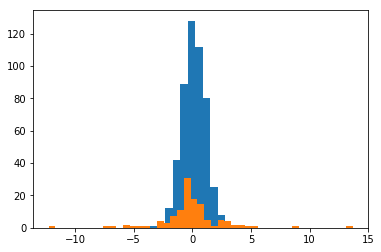

In [30]:
# for plotting
import pylab as pl
#%pylab inline

#for sampling from the normal (gaussian) distribution
random.seed(6) # note: same as random.seed(seed = 6)
mu, sigma = 0.1, 1.
n_dist = random.normal(mu, sigma, 500)

#for sampling from cauchy (lorentzian) distribution
random.seed(6)
c_dist = random.standard_cauchy(120)

pl.hist(n_dist)
pl.hist(c_dist,45)
pl.show() #not strictly necessary with %pylab inline, but removes some print-out

Great...but what if you wan't to use a non-standard cauchy distribution? (one not centered on zero and with gamma variance greater than 1) <br>
<br>
First, in these calls of *random.normal*, note that we have been using shorthand

```
random.normal(mu, sigma, 500)
```
which is really

```
random.normal(loc = mu, scale = sigma, size = 500)
```
the ```loc``` and ```scale``` keywords are, in general, related to the statistical variables that determine the center (ex. 'mean' for Normal) and variance (ex. 'beta' for Cauchy). <br>
Back to the question: to sample from a non-standard cauchy distribution, we'll need **SciPy**, namely [scipy.stats.cauchy(...)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html) which has the ```rvs()``` method for random-variable sampling.






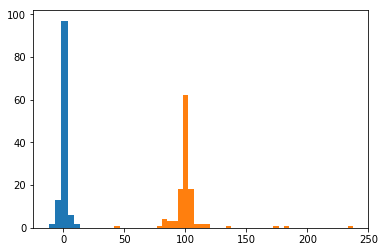

<class 'scipy.stats._continuous_distns.cauchy_gen'>


In [31]:
import scipy.stats
from scipy.stats import cauchy

random.seed(6)
c_dist = random.standard_cauchy(120)

random.seed(6)
c_dist2 = scipy.stats.cauchy.rvs(loc=100, scale=2.5, size=120)
pl.hist(c_dist,5)
pl.hist(c_dist2,45)
pl.show()
print(type(scipy.stats.cauchy))

There are a multitude of other statistical applications that can be evaluated with ```scipy.stats```; for example, on any specific continuous distribution (in this case of the *rv_continuous* class), the mean, variance, skewness, and kurtusis can be readily generated.



In [32]:
mean, var, skew, kurt = scipy.stats.norm.stats(moments='mvsk')
print('The mean of the normal distribution is ' + str(mean))
print('The variance of the normal distribution is ' + str(var))
print('The skew of the normal distribution is ' + str(skew))
print('The kurtosis of the normal distribution is ' + str(kurt))

The mean of the normal distribution is 0.0
The variance of the normal distribution is 1.0
The skew of the normal distribution is 0.0
The kurtosis of the normal distribution is 0.0


The additional method ```stats``` is specific to the ```rv_continuous``` class. If there is a distribution you can't find in ```numpy.random``` or ```scipy.stats```, you can actually generate a custom one.

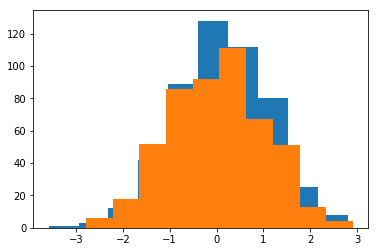

In [33]:
from scipy.stats import rv_continuous #import rv_continuous class

class gaussian_gen(rv_continuous):
  "Gaussian distribution"                           #comment describing function
  def _pdf(self, x):                       #rewrites the pdf method to be called
    return np.exp(-x**2 / 2.) / np.sqrt(2.0 * np.pi) #The custom function


custom_gauss = gaussian_gen() #instance created for custom rv_continuous class
n_dist2 = custom_gauss.rvs(size = 500) #instance method .rvs
pl.hist(n_dist)
pl.hist(n_dist2)
pl.show()

# Creating + Fitting 'Noisy' Data 

NumPy also has many built-in math functions. Trigonometric expressions like [np.sin](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html) can be called on numpy *array* for instance.

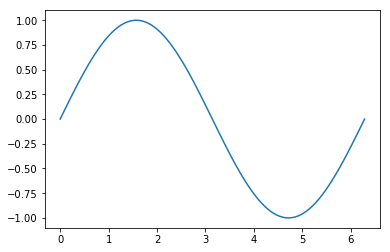

In [43]:
t = np.linspace(0, 2*np.pi, 101) #array of 101 pts evenly spaced from 0 to 2pi
y = np.sin(t) # apply trig sine function to array
pl.plot(t, y) # plot
pl.show()

Now, let's say we want to add noise to this data to simulate real data that one might collect from an instrument.

We can do this with the np.random routine.

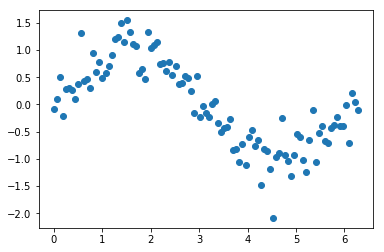

In [41]:
random.seed(51)
noisy_y = random.normal(loc = np.sin(t), scale = 0.3) # Gaussian noise add to y
pl.plot(x, noisy_y, 'o') # plot
pl.show()

Now the data generated from a continuous function acting on discrete points looks realistically noisy. <br> <br>
Imagine this were from an experiment, you might want to 'fit' it with some form of regression (going from discrete points back to a continuous function).<br>
NumPy has some black-box functions for regression, the most common of which are based on least-squares fitting (minimizing the square of the residual between the data and fit). <br>
A particularly easy one to use (if we naively assume the data is representative of a polynomial) is [np.polyfit(...)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)--used to perform a least-squares polynomial fit--and [np.poly1d](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html)--used to calculate a new *y* from the fit.


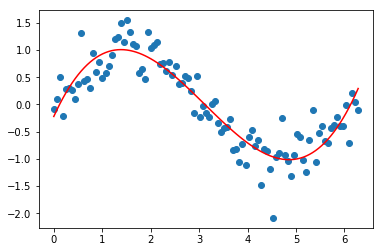

In [42]:
fit_obj = np.polyfit(t, noisy_y, 3) #perform least-squares fit
fit_fn = np.poly1d(fit_obj) #generate function parameters
fit_y = fit_fn(t) # apply function to x to generate fit y
pl.plot(t, noisy_y, 'o') #plot as 'o' dots
pl.plot(t, fit_y, 'r') #plot as red 'r' line
pl.show()

This looks pretty good! <br>
But, of course, knowing that this was generated from a sine function, outside of these bounds the fit would be rather poor. <br> <br>

If you *do* know your data is periodic, a better *basis* for your fit might be Fourier basis, or, on that same note: if the data is conditioned properly (windowed to zero, constant time interval, etc.), the fast Fourier Transform (of discrete data) is easily implementable in Numpy and could give the frequency of sine or cosine functions. The relevant functions for this are in the Numpy [fft](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) module.

## Linear (least-squares) fitting, in general
Focusing on the math behind np.poly1d, you realize it is actually solving a linear least-squares problem for the coefficients of the polynomial (the data $y$ is linear in the coefficients even though it is non-linear in $x$). <br> <br>
This means we could solve the above fitting more explicitly with a general least-squares problem by considering the features $x$ of the model that are linearly related to $y$ <br>
The general module for linear algebra in NumPy is [np.linalg](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html)

In [54]:
import numpy.linalg as linalg

Returning to the problem at hand, in generic notation, linear fitting means you have some data $y$, model parameters $x$, and $A$ a vector holding the data as it relates to each model parameter. In other words: <br>
$$y = Ax$$
and you want to solve for
$$x = A^{-1}y$$
<br>
If $A$ is invertible, then, it's easy enough to solve this problem with [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) and [np.linalg.inv](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.inv.html) <br> <br>
But $A$ is not invertible (in this case, it is not square), so we minimize the squared difference between $y$ and $Ax$ ('ordinary' least-squares fitting, a.k.a. minimize the L2 norm). This has the general solution:
$$ x = (A^TA)^{-1}A^Ty$$
First, lets define A more concretely in terms of our sine-wave/3rd order polynomial example.

In [53]:
#  The model we are trying to fit is y = mt^3 + mt^2 + mt + b
#the relationship b/w y and m in each is [t^3,   t^2,   t,  1]
A = np.vstack([t**3, t**2, t, np.ones(np.shape(t)[0])]).T
print('The shape of A is ' + str(np.shape(A)))
print('because there are 101 points (t) and 4 linear parameters')

The shape of A is (101, 4)
because there are 101 points (t) and 4 linear parameters


## Exercise 4
Solve for x with the general least squares solution
$$ x = (A^TA)^{-1}A^Ty$$
using [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) and [np.linalg.inv](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.inv.html) <br><br>
Assign the coefficients to variables ```m3```, ```m2```, ```m```, and ```c``` and use the next cell to plot the results

In [56]:
# Exercise 4
m3, m2, m, b = np.dot(linalg.inv(np.dot(A.T, A)), np.dot(A.T, y))

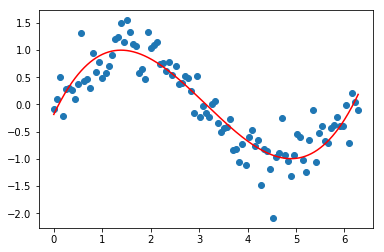

In [57]:
#to make our fit look continuous, we need finer sampling
tf = np.linspace(0, 2*np.pi, 501) #finer sampling points
fit_y_genlstsq = np.polyval([m3, m2, m, b], tf) #evaluate fit
pl.plot(t, noisy_y, 'o') #plot as 'o' dots
pl.plot(tf, fit_y_genlstsq, 'r') #plot as red 'r' line
pl.show()

The black-box way to solve this is just with [np.linalg.lstsq(...)](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html)

In [65]:
print('Within precision tolerance, it is ' + 
      str(np.allclose(np.linalg.lstsq(A, y)[0],
                      #index 0th element for coeffecients
                      [m3, m2, m, b])) + 
      ' that numpy.linalg.lstsq returns the same coefficients.')

Within precision tolerance, it is True that numpy.linalg.lstsq returns the same coefficients.


For non-linear fitting (parameters are not linearly related to the data), you would use [scipy.optimize.curve_fit(...)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit)